In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import spacy
# nlp = spacy.load('en_core_web_sm')

In [3]:
plt.style.use('seaborn-white')
sns.set_context("talk")

In [4]:
df = pd.read_csv('happydb/data/cleaned_hm.csv')
df.head()

,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category
0,27673,2053,24h,I went on a successful date with someone I fel...,I went on a successful date with someone I fel...,True,1,NaN,affection
1,27674,2,24h,I was happy when my son got 90% marks in his e...,I was happy when my son got 90% marks in his e...,True,1,NaN,affection
2,27675,1936,24h,I went to the gym this morning and did yoga.,I went to the gym this morning and did yoga.,True,1,NaN,exercise
3,27676,206,24h,We had a serious talk with some friends of our...,We had a serious talk with some friends of our...,True,2,bonding,bonding
4,27677,6227,24h,I went with grandchildren to butterfly display...,I went with grandchildren to butterfly display...,True,1,NaN,affection


In [5]:
df_sense = pd.read_csv('happydb/data/senselabel.csv')
df_sense.head()

,hmid,tokenOffset,word,lowercaseLemma,POS,MWE,offsetParent,supersenseLabel
0,31526,1,I,i,PRON,O,0,NaN
1,31526,2,found,find,VERB,O,0,v.cognition
2,31526,3,a,a,DET,O,0,NaN
3,31526,4,silver,silver,ADJ,O,0,NaN
4,31526,5,coin,coin,NOUN,O,0,n.artifact


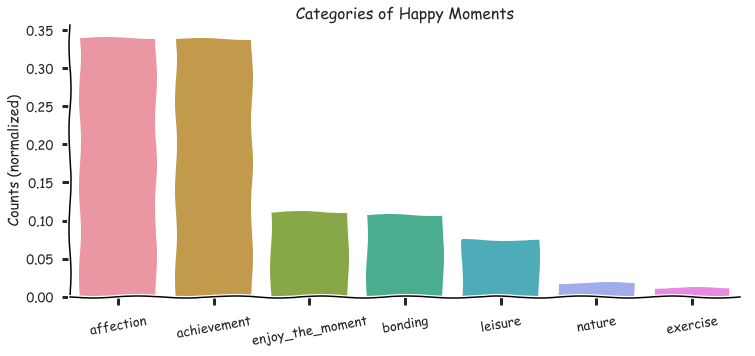

In [31]:
prob = df['predicted_category'].value_counts(normalize=True)
with plt.xkcd():
    f, ax = plt.subplots(figsize=(12,5))
    sns.barplot(x=prob.index,y=prob)
#     sns.countplot(x='predicted_category', data=df);
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_axisbelow(True)
    plt.xticks(rotation=10)
    plt.ylabel('Counts (normalized)')
    plt.xlabel(' ')
    plt.title('Categories of Happy Moments')

# Persons that made subject happy

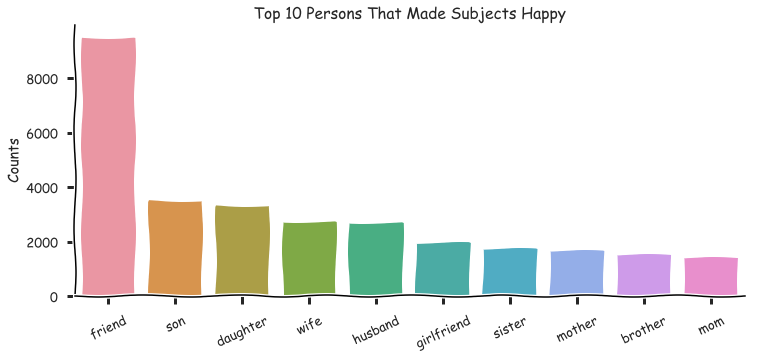

In [30]:
prob = df_sense[df_sense['supersenseLabel'] == 'n.person']['lowercaseLemma'].value_counts()[:10]
with plt.xkcd():
    f, ax = plt.subplots(figsize=(12,5))
    sns.barplot(x=prob.index,y=prob)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_axisbelow(True)
    plt.xticks(rotation=25)
    plt.ylabel('Counts')
    plt.xlabel('')
    plt.title('Top 10 Persons That Made Subjects Happy')

In [33]:
df_sense['supersenseLabel'].unique()

array([nan, 'v.cognition', 'n.artifact', 'v.stative', 'n.substance',
       'n.food', 'n.location', 'n.communication', 'v.motion', 'n.time',
       'n.person', 'n.event', 'v.communication', 'v.social', 'n.group',
       'n.cognition', 'v.possession', 'n.state', 'v.emotion',
       'n.quantity', 'n.act', 'v.perception', 'v.change', 'v.consumption',
       'n.possession', 'n.body', 'v.contact', 'n.relation', 'n.attribute',
       'n.feeling', 'n.phenomenon', 'n.process', 'v.competition',
       'v.creation', 'v.body', 'n.animal', 'n.natural_object', 'n.motive',
       'n.plant', 'v.weather', 'n.shape', 'n.other'], dtype=object)

In [47]:
df_sense[df_sense['supersenseLabel'] == 'v.cognition']['lowercaseLemma'].value_counts()[:20]

find        4350
felt        2376
want        1772
think       1597
feel        1431
know        1331
need        1122
learn        944
make         877
decide       780
expect       635
surprise     612
look         610
remember     546
get          525
accept       512
realize      502
have         444
see          437
forget       422
Name: lowercaseLemma, dtype: int64